In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sdv import SDV
from sdv import Metadata
from matplotlib import pyplot as plt

In [2]:
HOME_PATH = '' #home directory of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/A_Diabetes_Data_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/SDV/A_Diabetes_Data_Synthetic_SDV.csv'

## 1. Read data

In [3]:
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_columns = real_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.append('admission_type_id')
categorical_columns.append('discharge_disposition_id')
categorical_columns.append('admission_source_id')
categorical_columns
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category')
data_train = real_data
real_data

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,81844290,94788,Female,[70-80),1,1,7,4,48,0,11,0,0,0,9,None,Norm,No,No,NO
1,396159158,135023315,Male,[50-60),1,1,7,1,42,0,5,0,0,0,6,None,None,No,No,>30
2,31258956,18397782,Male,[80-90),1,1,7,4,44,0,10,0,0,0,7,None,None,No,Yes,NO
3,210691074,67509558,Male,[80-90),1,3,7,3,54,0,8,0,0,0,8,None,None,Ch,Yes,NO
4,104902980,23272362,Female,[70-80),1,11,7,11,35,3,23,0,0,1,8,None,None,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,31296060,3344202,Male,[70-80),1,1,7,2,35,0,12,0,0,0,9,None,None,No,No,>30
81408,159139902,93611655,Male,[60-70),5,1,1,5,63,2,23,0,0,0,9,None,None,Ch,Yes,<30
81409,232191828,85600899,Male,[70-80),3,3,1,3,55,1,33,0,0,0,9,None,None,Ch,Yes,NO
81410,6740700,8208234,Female,[60-70),6,25,7,12,77,2,21,0,0,0,9,None,None,Ch,Yes,>30


In [4]:
real_data.dtypes

encounter_id                   int64
patient_nbr                    int64
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
max_glu_serum               category
A1Cresult                   category
change                      category
diabetesMed                 category
readmitted                  category
dtype: object

### 1.1. Create metada

In [5]:
metadata = Metadata()
metadata.add_table(name='data', data=real_data, primary_key='')
metadata

Metadata
  root_path: .
  tables: ['data']
  relationships:

In [6]:
tables = dict()
tables['data'] = real_data
tables

{'data':        encounter_id  patient_nbr  gender      age admission_type_id  \
 0          81844290        94788  Female  [70-80)                 1   
 1         396159158    135023315    Male  [50-60)                 1   
 2          31258956     18397782    Male  [80-90)                 1   
 3         210691074     67509558    Male  [80-90)                 1   
 4         104902980     23272362  Female  [70-80)                 1   
 ...             ...          ...     ...      ...               ...   
 81407      31296060      3344202    Male  [70-80)                 1   
 81408     159139902     93611655    Male  [60-70)                 5   
 81409     232191828     85600899    Male  [70-80)                 3   
 81410       6740700      8208234  Female  [60-70)                 6   
 81411      60115668     77943780  Female  [40-50)                 6   
 
       discharge_disposition_id admission_source_id  time_in_hospital  \
 0                            1                   7  

## 2. Train the model and generate data

In [7]:
sdv = SDV()
sdv.fit(metadata, tables)

In [8]:
samples = sdv.sample()
synthetic_data = samples['data']
synthetic_data

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,-28804602,41361052,Male,[50-60),3,1,6,5,14,2,26,1,-1,1,6,None,None,No,No,NO
1,44295622,42357617,Female,[50-60),1,25,7,6,77,2,15,1,0,1,8,None,None,No,Yes,>30
2,120436308,80879232,Female,[70-80),3,1,2,9,49,2,18,0,1,1,9,None,None,No,Yes,NO
3,240827370,61122839,Male,[60-70),1,3,7,5,65,2,33,1,-1,1,9,None,None,Ch,Yes,NO
4,291306426,102313008,Female,[40-50),1,1,1,7,69,2,21,-1,0,2,7,None,None,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,188165461,111175154,Male,[80-90),3,1,4,5,34,2,13,0,1,0,8,None,None,No,Yes,NO
81408,39568334,17946770,Male,[80-90),8,1,7,8,65,3,15,0,0,2,9,None,None,No,Yes,>30
81409,211986492,54424724,Male,[40-50),1,6,7,2,42,1,18,-2,2,2,10,None,None,No,Yes,NO
81410,238225577,70292306,Male,[80-90),1,1,7,4,30,-1,19,1,-1,2,7,None,None,No,No,NO


In [9]:
real_data.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,8.141200e+04,8.141200e+04,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000
mean,1.654583e+08,5.432315e+07,4.401513,43.077839,1.338107,16.008340,0.368115,0.198853,0.636122,7.421817
std,1.028827e+08,3.871775e+07,2.993730,19.736568,1.704868,8.119336,1.264267,0.928555,1.266526,1.934080
min,1.573800e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.502604e+07,2.340955e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.525290e+08,4.549931e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.307024e+08,8.749271e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438572e+08,1.894815e+08,14.000000,132.000000,6.000000,81.000000,40.000000,76.000000,19.000000,16.000000


In [10]:
synthetic_data.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,8.141200e+04,8.141200e+04,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000
mean,1.646017e+08,5.418699e+07,4.397239,43.061305,1.342394,16.029639,0.369798,0.193116,0.637388,7.418489
std,1.028300e+08,3.881507e+07,3.000615,19.721598,1.735224,8.110669,1.293256,0.974196,1.296479,1.954501
min,-2.870001e+08,-1.162046e+08,-9.000000,-48.000000,-6.000000,-18.000000,-6.000000,-5.000000,-5.000000,-1.000000
25%,9.491212e+07,2.800825e+07,2.000000,30.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,1.646299e+08,5.413950e+07,4.000000,43.000000,1.000000,16.000000,0.000000,0.000000,1.000000,7.000000
75%,2.338440e+08,8.043913e+07,6.000000,56.000000,2.000000,22.000000,1.000000,1.000000,1.000000,9.000000
max,6.411673e+08,2.225456e+08,18.000000,131.000000,9.000000,57.000000,6.000000,5.000000,6.000000,16.000000


KeyError: 17

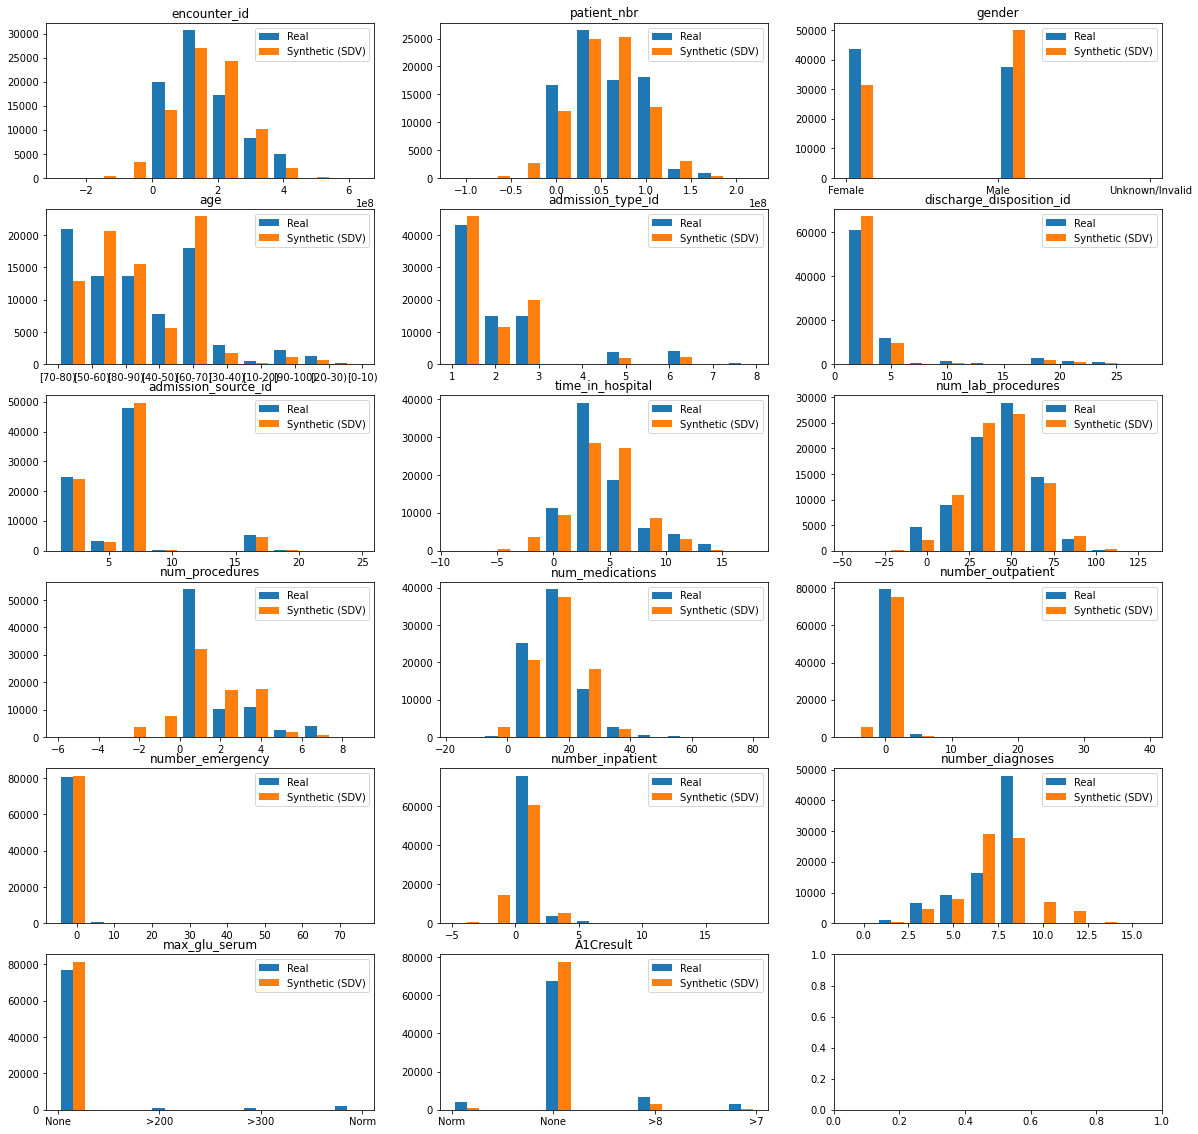

In [11]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20,20))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2], 12:[4,0],
      13:[4,1], 14:[4,2], 15:[5,0], 16:[5,1]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (SDV)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[5,2])
fig.tight_layout(pad=1.1)

In [12]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)